In [309]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Importing necessary libraries

In [310]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [311]:
#load data
train_df=pd.read_csv("../input/titanic/train.csv")
test_df=pd.read_csv("../input/titanic/test.csv")

# Exploratory Data Analysis

In [312]:
#printing 5 rows of data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [313]:
train_df.info() #to get a quick description of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [314]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b93f27150>,
      dtype=object)

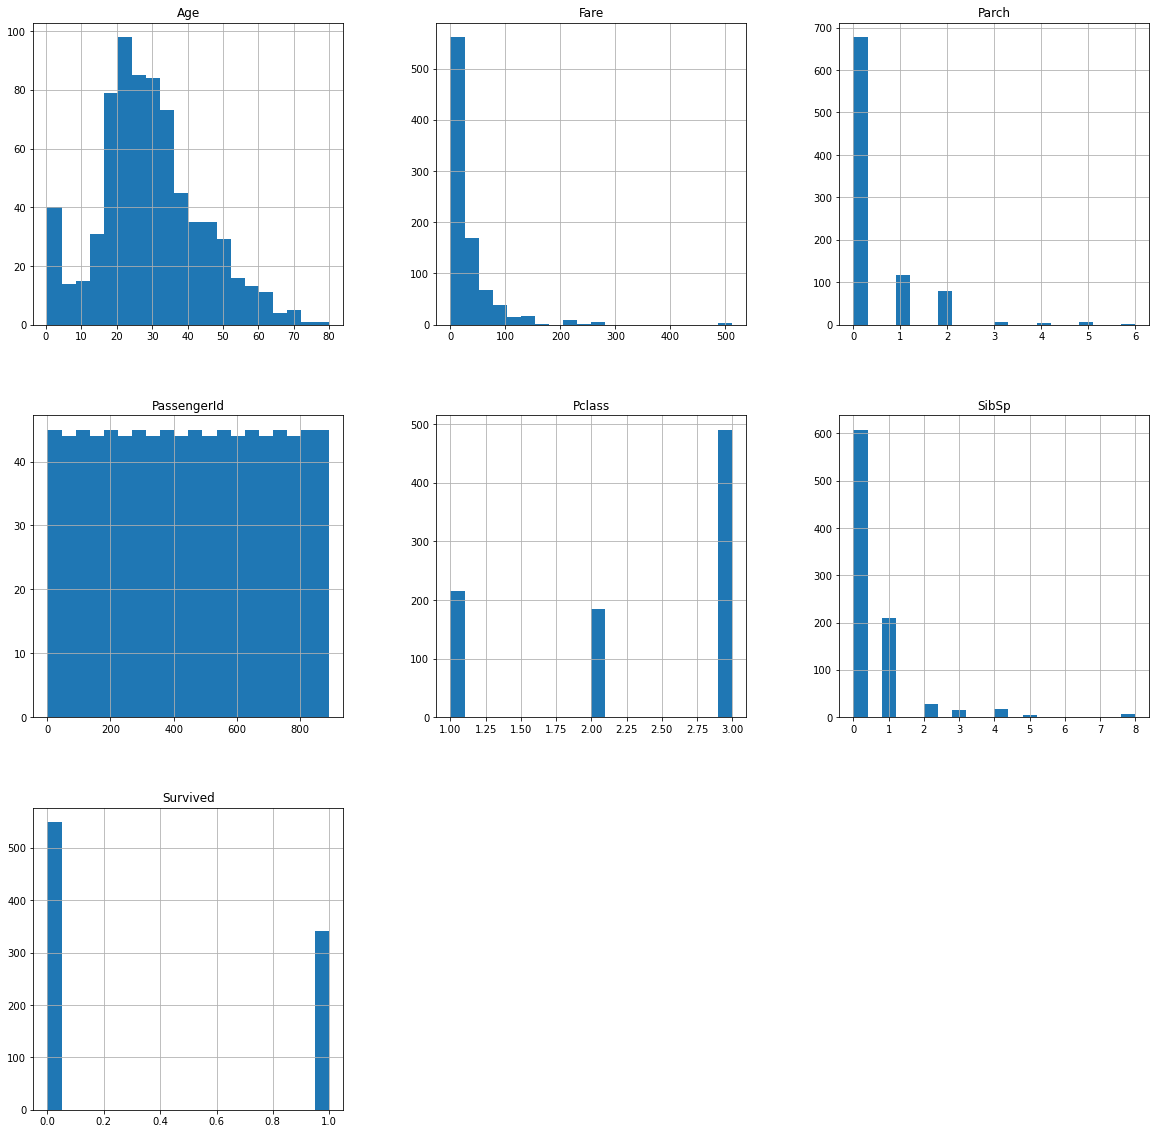

In [315]:
train_df.hist(bins=20,figsize=(20,20)) #histogram for each numerical attribute

In [316]:
#Handling the missing value
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [317]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We can use seaborn to crate heatmap to check where we have missing values.

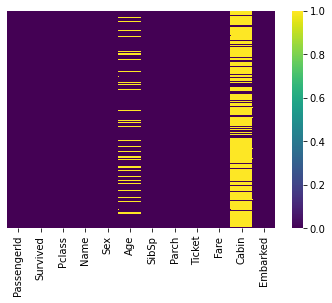

In [318]:
sns.heatmap(train_df.isnull(),yticklabels=False,cmap='viridis')

In training dataser approximately 20 percent of Age data is missing. We have to deal with 177 missing value which can be tricky. But 77 percent of Cabin data is missing which is very large . It is better to drop it from dataset.The Embarked feature has only 2 missing values, which can easily be filled.

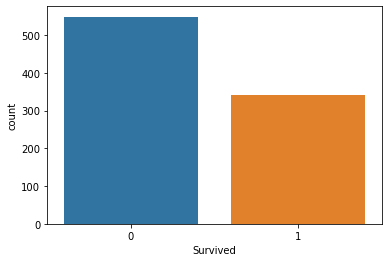

In [319]:
sns.countplot(x="Survived",data=train_df)#Analysing wheather the data is imbalance or not

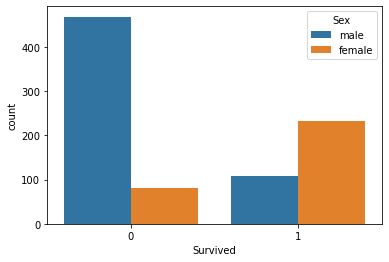

In [320]:
sns.countplot(x='Survived',hue='Sex',data=train_df)

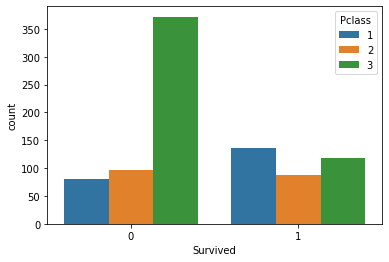

In [321]:
sns.countplot(x='Survived',hue='Pclass',data=train_df)

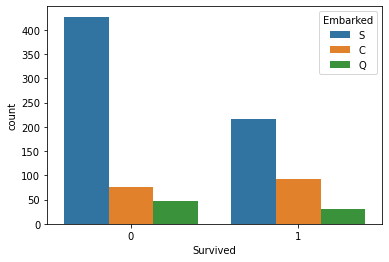

In [322]:
sns.countplot(x='Survived',hue='Embarked',data=train_df)

****From the above plot we can be concluded that:

1.The Survival rate of women passenger is higher than men passenger

2.The Survival rate of the passenger from higher class is comparatively more than other classes

3.The passengers who embarked from the port ‘Southampton' having higher chances of survival

# Data Preprocessing

Dropping the passenger_id from training dataset because it dosent contribute to the passenger survival probability

In [323]:
train_df = train_df.drop("PassengerId", axis=1)

In [324]:
data=[train_df,test_df]
for dataset in data:
    dataset.drop("Cabin",axis=1,inplace=True) #dropping the cabin column

In [325]:
data=[train_df,test_df]
for dataset in data:
    median=dataset['Age'].median()
    dataset["Age"]=dataset['Age'].fillna(median) #Replacing the missing values by the median value
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Ag

In [326]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [327]:
common_value='S'
data=[train_df,test_df]
for dataset in data:
    dataset["Embarked"]=dataset["Embarked"].fillna(common_value)  #replacing the missing values with most frequent value(mode)
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Ag

In [328]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

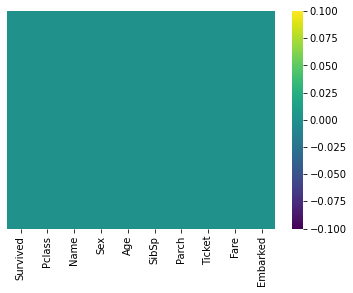

In [329]:
sns.heatmap(train_df.isnull(),yticklabels=False,cmap='viridis')

In [330]:
#Creating a new feature "Fare_Per_Person" which can be useful

data = [train_df, test_df]
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['SibSp'] + dataset['Parch']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

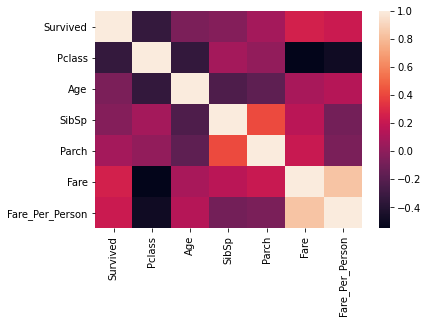

In [331]:
train_df.corr()
sns.heatmap(train_df.corr())

In [332]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
colum_to_scale=['Age','Fare_Per_Person','Parch','SibSp']
data = [train_df, test_df]
for dataset in data:
    dataset[colum_to_scale]=std.fit_transform(dataset[colum_to_scale])

In [333]:
#dropping the Ticket and Name feature from dataset
data = [train_df, test_df]
for dataset in data:
    dataset.drop(['Name','Ticket'],axis=1,inplace=True)

In [334]:
#handling Categirical feature
gender = pd.get_dummies(train_df['Sex'],drop_first=True)
embarked= pd.get_dummies(train_df['Embarked'],drop_first=True)
train_df = pd.concat([train_df,gender,embarked],axis=1)
train_df.drop(['Sex','Embarked','Fare'],axis=1,inplace=True)

gender1 = pd.get_dummies(test_df['Sex'],drop_first=True)
embarked1= pd.get_dummies(test_df['Embarked'],drop_first=True)
test_df = pd.concat([test_df,gender1,embarked1],axis=1)
test_df.drop(['Sex','Embarked','Fare'],axis=1,inplace=True)

# Building Machine Learning Models

In [335]:
#separating the dependent and independent features
X = train_df.drop("Survived", axis=1)
Y = train_df["Survived"]
test_X  = test_df.drop("PassengerId", axis=1).copy()

In [336]:
#split the data into test and training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,random_state=42)

In [337]:
#Stochastic Gradient Descent (SGD):
SGD = SGDClassifier(max_iter=5, tol=None)
SGD.fit(X_train, Y_train)
Y_pred1 = SGD.predict(X_test)

SGD.score(X_train, Y_train)

accuracy_SGD = round(SGD.score(X_train, Y_train) * 100, 2)

test_accuracy_SGD = round(accuracy_score(Y_test,Y_pred1)*100,2)

In [338]:
#RANDOM fOREST CLASSIFIER
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

Y_pred2 = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
accuracy_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
test_accuracy_random = round(accuracy_score(Y_test,Y_pred2)*100,2)

In [339]:
#LOGISTIC REGRESSION
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred3 = logreg.predict(X_test)

accuracy_logreg = round(logreg.score(X_train, Y_train) * 100, 2)
test_accuracy_log = round(accuracy_score(Y_test,Y_pred3)*100,2)

In [340]:
#K NEAREST NEIGHBOUR
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, Y_train)
Y_pred4 = knn.predict(X_test)
accuracy_knn = round(knn.score(X_train, Y_train) * 100, 2)
test_accuracy_knn = round(accuracy_score(Y_test,Y_pred4)*100,2)

In [341]:
#GAUSSIAN NEIVE BAYS
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred5 = gaussian.predict(X_test)
accuracy_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
test_accuracy_gaussian = round(accuracy_score(Y_test,Y_pred5)*100,2)

In [342]:
#LINEAR SUPPORT VECTOR MACHINE
SVC = LinearSVC()
SVC.fit(X_train, Y_train)

Y_pred6 = SVC.predict(X_test)

accuracy_svc = round(SVC.score(X_train, Y_train) * 100, 2)
test_accuracy_svc = round(accuracy_score(Y_test,Y_pred6)*100,2)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [343]:
#DECISION TREE
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
Y_pred7 = dtree.predict(X_test)
accuracy_dtree = round(dtree.score(X_train, Y_train) * 100, 2)
test_accuracy_dtree = round(accuracy_score(Y_test,Y_pred7)*100,2)

In [344]:
train_result = pd.DataFrame({
    'ML Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [accuracy_SGD, accuracy_knn, accuracy_logreg, 
              accuracy_random_forest, accuracy_gaussian, accuracy_svc, test_accuracy_dtree]})
train_result = train_result.sort_values(by='Score', ascending=False)
train_result.head(9)

,ML Model,Score
3,Random Forest,96.41
1,KNN,85.03
2,Logistic Regression,79.94
5,Stochastic Gradient Decent,79.94
4,Naive Bayes,79.64
0,Support Vector Machines,78.44
6,Decision Tree,77.58


In [345]:
test_result = pd.DataFrame({
    'ML Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [test_accuracy_SGD, test_accuracy_knn, test_accuracy_log, 
              test_accuracy_random, test_accuracy_gaussian, test_accuracy_svc, accuracy_dtree]})
test_result = test_result.sort_values(by='Score', ascending=False)
test_result.head(9)

,ML Model,Score
6,Decision Tree,96.41
2,Logistic Regression,80.27
1,KNN,79.37
3,Random Forest,79.37
0,Support Vector Machines,78.03
5,Stochastic Gradient Decent,77.58
4,Naive Bayes,77.13


In [346]:
from sklearn.model_selection import cross_val_score
rd = RandomForestClassifier()
scores = cross_val_score(rd, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.85074627 0.7761194  0.82089552 0.76119403 0.79104478 0.74626866
 0.8358209  0.76119403 0.72727273 0.84848485]
Mean: 0.7919041157847129
Standard Deviation: 0.04222426950368284


In [347]:
Imp= pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
Imp = Imp.sort_values('Importance',ascending=False)
Imp.head(8)

,Feature,Importance
1,Age,0.300
5,male,0.271
4,Fare_Per_Person,0.194
0,Pclass,0.091
2,SibSp,0.062
3,Parch,0.041
7,S,0.029
6,Q,0.013


In [348]:
rd.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

# Hyperparameter Tuning

In [349]:
from sklearn.model_selection import RandomizedSearchCV
param_test1 = {
    'n_estimators': [100,200,300,350,500,750, 1000],
    'criterion' : ['gini', 'entropy'], 
    'max_depth':[5,10,15,20,25,30],    
    'min_samples_leaf' : [1,2,5, 10], 
    'min_samples_split' : [1,2, 10,25]
}
gsearch1 = RandomizedSearchCV(estimator = rd,param_distributions = param_test1,scoring='roc_auc', cv=5)

gsearch1.fit(X_train, Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 2, 10, 25],
                                        'n_estimators': [100, 200, 300, 350,
                                                         500, 750, 1000]},
                   scoring='roc_auc')

In [350]:
gsearch1.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'gini'}

In [351]:
gsearch1.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [352]:
rd1=gsearch1.best_estimator_ #RandomForestClassifier(min_samples_leaf=2,min_samples_split=10, n_estimators=500)
rd1.fit(X_train, Y_train)
predictions = rd1.predict(X_test)
print(predictions)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0]


In [353]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(rd1, X_train, Y_train, cv=10)
confusion_matrix(Y_train, y_train_pred)

array([[377,  38],
       [ 86, 167]])

In [354]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, y_train_pred))
print("Recall:",recall_score(Y_train, y_train_pred))

Precision: 0.8146341463414634
Recall: 0.6600790513833992


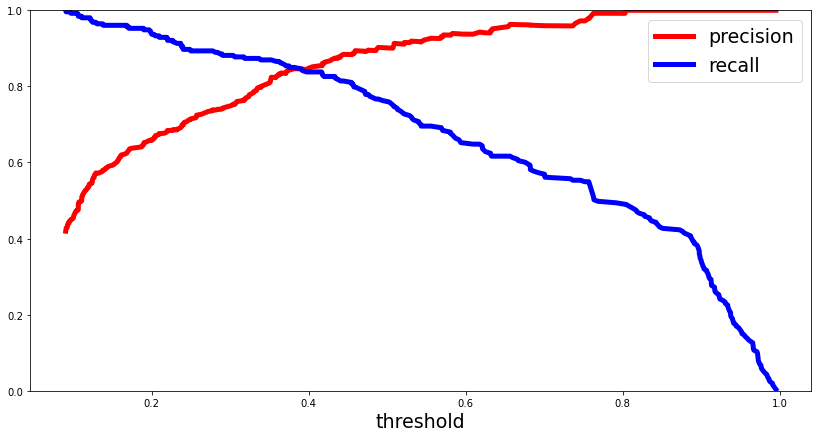

In [355]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = rd1.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

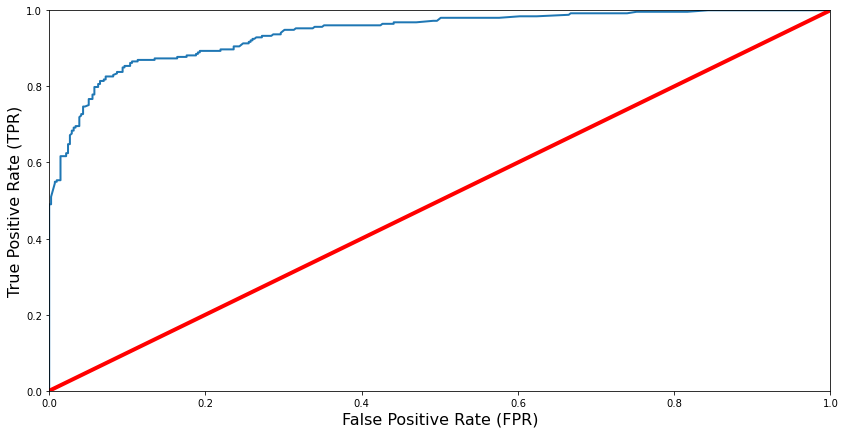

In [356]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [357]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9401733415876947


In [358]:
#predicting the test data
pred_y=rd1.predict(test_X).astype(int)

In [359]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": pred_y})
submission.to_csv('submission.csv', index=False)